# 21.店舗を絞り込んで可視化できるようにしてみよう

In [1]:
!pip3 install ipywidgets

  Using cached https://files.pythonhosted.org/packages/6b/bb/285066ddd710779cb69f03d42fa72fbfe4352b4895eb6abab551eae1535a/ipywidgets-7.6.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4a/c8/2a8a5cb1afdecfa92c000e3a5d63a9fdd1b7fe77570f65536b3f05a05f14/ipykernel-6.4.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/18/4d/22a93473bca99c80f2d23f867ebbfee2f6c8e186bf678864eec641500910/jupyterlab_widgets-1.0.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/38/4c/466298b114eea62f300dbef98cc2c33c6cbc439f1f71bc199c674ae23c2c/traitlets-5.1.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e7/c7/dd50978c637a7af8234909277c4e7ec1b71310c13fb3135f3c8f5b6e045f/nbformat-5.1.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fa/bc/9bd3b5c2b4774d5f33b2d544f1460be9df7df2fe42f352135381c347c69a/ipython_genutils-0.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/

  Using cached https://files.pythonhosted.org/packages/cb/17/b1162b39786c44e14d30ee557fbf41276c4a966dab01106c15fb70f5c27a/terminado-0.12.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/19/c7/f7d49d1347b87a6c9324688ead2f02e1c119b20e0cc0474e69edfe63ff11/nbconvert-6.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/47/26/3435896d757335ea53dce5abf8d658ca80757a7a06258451b358f10232be/Send2Trash-1.8.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/09/da/4e8471ff825769581593b5b84769d32f58e5373b59fccaf355d3529ad530/prometheus_client-0.11.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/25/73/fc78a52dcf3be8c60587b588af6ec8b02b1aa48a9059438ab451f05983a0/argon2_cffi-21.1.0-cp35-abi3-macosx_10_14_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/94/42/d8bca8e99789bcc35dfa9b03acaa8b518720d6e060163745bc2bf2ead842/Jinja2-3.0.2-py3-none-any.whl
  Using cached https://files.pythonhos

In [2]:
import pandas as pd
from IPython.display import display, clear_output

m_store = pd.read_csv('m_store.csv')
m_area = pd.read_csv('m_area.csv')

order_data = pd.read_csv('tbl_order_202004.csv')
order_data = pd.merge(order_data, m_store, on='store_id', how='left')
order_data = pd.merge(order_data, m_area, on='area_cd', how='left')

# 名称
order_data.loc[order_data['takeout_flag'] == 0, 'takeout_name'] = 'デリバリー'
order_data.loc[order_data['takeout_flag'] == 1, 'takeout_name'] = 'お持ち帰り'

order_data.loc[order_data['status'] == 0, 'status_name'] = '受付'
order_data.loc[order_data['status'] == 1, 'status_name'] = 'お支払い済み'
order_data.loc[order_data['status'] == 2, 'status_name'] = 'お渡し済み'
order_data.loc[order_data['status'] == 9, 'status_name'] = 'キャンセル'

order_data.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1,4144,1,浅草店,TK,東京,東京,お持ち帰り,お支払い済み
1,18941733,85,C48773811,26,91834983,2020-04-01 11:00:00,2020-04-01 11:22:00,0,2877,2,目黒店,TK,東京,東京,デリバリー,お渡し済み
2,56217880,76,C66287421,36,64409634,2020-04-01 11:00:00,2020-04-01 11:15:00,0,2603,2,本郷店,TK,東京,東京,デリバリー,お渡し済み
3,28447783,190,C41156423,19,73032165,2020-04-01 11:00:00,2020-04-01 11:16:00,0,2732,2,栃木店,TO,北関東,栃木,デリバリー,お渡し済み
4,32576156,191,C54568117,71,23281182,2020-04-01 11:00:00,2020-04-01 11:53:00,0,2987,2,伊勢崎店,GU,北関東,群馬,デリバリー,お渡し済み


In [3]:
from ipywidgets import Dropdown

def order_by_store(val):
    clear_output()
    display(dropdown)
    pick_data = order_data.loc[(order_data['store_name'] == val['new']) & (order_data['status'].isin([1, 2]))]
    display(pick_data.head())
    
store_list = m_store['store_name'].tolist()

dropdown = Dropdown(options=store_list)
dropdown.observe(order_by_store, names='value')
display(dropdown)

Dropdown(index=3, options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店', '江戸川店', …

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
157,2531743,4,C92443692,67,85022159,2020-04-01 11:13:13,2020-04-01 11:57:13,0,2064,2,北千住店,TK,東京,東京,デリバリー,お渡し済み
380,39064833,4,C20047719,76,35781015,2020-04-01 11:32:32,2020-04-01 11:48:32,1,698,1,北千住店,TK,東京,東京,お持ち帰り,お支払い済み
479,86916169,4,C15610670,79,90260649,2020-04-01 11:39:39,2020-04-01 12:26:39,0,3530,2,北千住店,TK,東京,東京,デリバリー,お渡し済み
671,42261602,4,C71523997,15,49883144,2020-04-01 11:56:56,2020-04-01 12:13:56,0,3901,2,北千住店,TK,東京,東京,デリバリー,お渡し済み
734,48703173,4,C57515212,99,77446444,2020-04-01 12:02:02,2020-04-01 12:12:02,1,4692,1,北千住店,TK,東京,東京,お持ち帰り,お支払い済み


Dropdown(index=5, options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店', '江戸川店', …

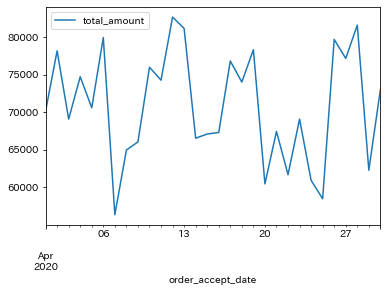

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib

def graph_by_store(val):
    clear_output()
    display(dropdown2)
    pick_data = order_data.loc[(order_data['store_name'] == val['new']) & (order_data['status'].isin([1, 2]))]
    temp = pick_data[['order_accept_date', 'total_amount']].copy()
    temp.loc[:, 'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date', inplace=True)
    temp.resample('D').sum().plot()
    
dropdown2 = Dropdown(options=store_list)
dropdown2.observe(graph_by_store, names='value')
display(dropdown2)

# 22.複数店舗の詳細を可視化できるようにしてみよう

In [5]:
from ipywidgets import SelectMultiple

def order_by_multi(val):
    clear_output()
    display(select)
    pick_data = order_data.loc[(order_data['store_name'] .isin(val['new'])) & (order_data['status'].isin([1, 2]))]
    display(pick_data.head())
    
select = SelectMultiple(options = store_list)
select.observe(order_by_multi, names='value')
display(select)


SelectMultiple(index=(1, 2), options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店…

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
38,84034264,2,C80963257,14,77682610,2020-04-01 11:03:03,2020-04-01 11:26:03,0,2154,2,あきる野店,TK,東京,東京,デリバリー,お渡し済み
127,39369894,3,C19472009,99,6635308,2020-04-01 11:10:10,2020-04-01 12:08:10,0,2987,2,足立店,TK,東京,東京,デリバリー,お渡し済み
271,45262722,3,C88136991,66,12174928,2020-04-01 11:22:22,2020-04-01 12:11:22,0,2732,2,足立店,TK,東京,東京,デリバリー,お渡し済み
451,2272387,3,C34489272,1,47221468,2020-04-01 11:37:37,2020-04-01 12:22:37,0,3234,2,足立店,TK,東京,東京,デリバリー,お渡し済み
678,50000478,2,C63288793,30,91377121,2020-04-01 11:57:57,2020-04-01 12:29:57,1,1900,1,あきる野店,TK,東京,東京,お持ち帰り,お支払い済み


SelectMultiple(index=(1, 2), options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店…

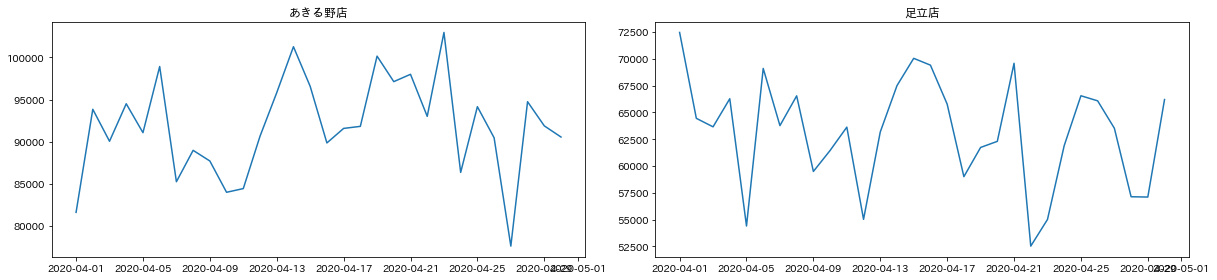

In [6]:
def graph_by_multi(val):
    clear_output()
    display(select2)
    
    fig = plt.figure(figsize=(17, 4))
    
    
    i = 0
    
    for trg in val['new']:
        pick_data = order_data.loc[(order_data['store_name'] == trg) & (order_data['status'].isin([1, 2]))]
        temp = pick_data[['order_accept_date', 'total_amount', 'store_name']].copy()
        temp.loc[:, 'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
        temp.set_index('order_accept_date', inplace=True)
        i += 1
        ax  = fig.add_subplot(1, len(val['new']), i)
        ax.plot(temp.resample('D').sum())
        ax.set_title(trg)
        
        fig.tight_layout()
        
select2 = SelectMultiple(options = store_list)
select2.observe(graph_by_multi, names='value')
display(select2)

# 23.スライドバーを用いてオーダー件数を調べてみよう

In [7]:
from ipywidgets import IntSlider

def store_lower(val):
    clear_output()
    display(slider)
    temp = order_data.groupby('store_name')
    print(temp.size()[temp.size() < val['new']])
    
slider = IntSlider(value=1100, min=1000, max=2000, step=100, description='件数：')
slider.observe(store_lower, names='value')
display(slider)

IntSlider(value=1100, description='件数：', max=2000, min=1000, step=100)

store_name
さいたま緑店    1021
亀有店       1035
佐倉店        879
六本木店       998
前橋店        821
          ... 
都筑店       1009
銀座店        967
鎌倉店        976
駒沢店       1001
高田馬場店     1065
Length: 66, dtype: int64


In [8]:
def store_upper(val):
    clear_output()
    display(slider2)
    temp = order_data.groupby('store_name')
    print(temp.size()[temp.size() > val['new']])
    
slider2 = IntSlider(value=1600, min=1000, max=2000, step=100, description='件数：')
slider2.observe(store_upper, names='value')
display(slider2)

IntSlider(value=1600, description='件数：', max=2000, min=1000, step=100)

# 24.トグルボタンで地域データを抽出しよう

In [9]:
from ipywidgets import ToggleButtons

area_list = m_area['wide_area'].unique()

def order_by_area(val):
    clear_output()
    display(toggle)
    pick_data = order_data.loc[(order_data['wide_area'] == val['new']) & (order_data['status'].isin([1, 2]))]
    display(pick_data.head())
    
toggle = ToggleButtons(options=area_list)
toggle.observe(order_by_area, names='value')
display(toggle)

ToggleButtons(index=3, options=('東京', '神奈川', '千葉', '埼玉', '北関東'), value='埼玉')

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
10,5734749,179,C83670320,35,84618787,2020-04-01 11:00:00,2020-04-01 11:35:00,0,3319,2,和光店,SA,埼玉,埼玉,デリバリー,お渡し済み
32,28698586,179,C60563867,7,2400310,2020-04-01 11:02:02,2020-04-01 11:19:02,0,2308,2,和光店,SA,埼玉,埼玉,デリバリー,お渡し済み
60,96590586,159,C48324617,27,8126998,2020-04-01 11:05:05,2020-04-01 11:31:05,0,3319,2,久喜店,SA,埼玉,埼玉,デリバリー,お渡し済み
65,41892174,162,C46613710,9,55096054,2020-04-01 11:05:05,2020-04-01 12:27:05,0,2987,2,越谷店,SA,埼玉,埼玉,デリバリー,お渡し済み
69,57018266,177,C85121147,21,29734816,2020-04-01 11:05:05,2020-04-01 11:33:05,0,3190,2,本庄店,SA,埼玉,埼玉,デリバリー,お渡し済み


ToggleButtons(index=3, options=('東京', '神奈川', '千葉', '埼玉', '北関東'), value='埼玉')

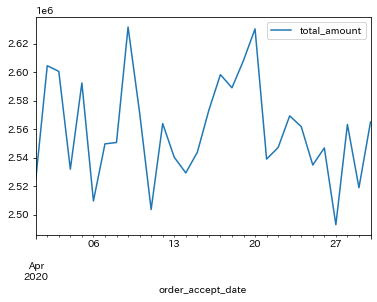

In [10]:
def graph_by_area(val):
    clear_output()
    display(toggle2)
    pick_data = order_data.loc[(order_data['wide_area'] == val['new']) & (order_data['status'].isin([1, 2]))]
    temp = pick_data[['order_accept_date', 'total_amount']].copy()
    temp.loc[:, 'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date', inplace=True)
    temp.resample('D').sum().plot()
    
toggle2 = ToggleButtons(options=area_list)
toggle2.observe(graph_by_area, names='value')
display(toggle2)

# 25.日付を指定してデータを抽出しよう

In [11]:
from ipywidgets import DatePicker
import datetime

order_data.loc[:, 'order_date'] = pd.to_datetime(order_data['order_accept_date']).dt.date

def order_by_date(val):
    clear_output()
    display(date_picker)
    pick_data = order_data.loc[(order_data['order_date'] == val['new']) & (order_data['status'].isin([1, 2]))]
    print(len(pick_data))
    display(pick_data.head())
    
date_picker = DatePicker(value=datetime.datetime(2020, 4, 1))
date_picker.observe(order_by_date, names='value')
display(date_picker)

DatePicker(value=datetime.date(2020, 4, 8))

6379


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
54466,53065342,95,C26662632,85,79440470,2020-04-08 11:00:00,2020-04-08 11:51:00,0,2252,2,麻生店,KN,神奈川,神奈川,デリバリー,お渡し済み,2020-04-08
54467,8602118,9,C73673754,22,92978169,2020-04-08 11:00:00,2020-04-08 11:20:00,0,4744,2,高島平店,TK,東京,東京,デリバリー,お渡し済み,2020-04-08
54469,86216710,186,C53910592,50,70785599,2020-04-08 11:00:00,2020-04-08 11:35:00,0,2328,2,足利店,TO,北関東,栃木,デリバリー,お渡し済み,2020-04-08
54470,16979078,185,C28441229,20,59747932,2020-04-08 11:00:00,2020-04-08 11:39:00,0,1900,2,守谷店,IB,北関東,茨城,デリバリー,お渡し済み,2020-04-08
54471,53827169,191,C92124871,45,73474499,2020-04-08 11:00:00,2020-04-08 11:35:00,0,5100,2,伊勢崎店,GU,北関東,群馬,デリバリー,お渡し済み,2020-04-08


In [14]:
min_date = datetime.date(2020, 4, 1)
max_date = datetime.date(2020, 4, 30)

def order_between_date():
    clear_output()
    display(date_picker_min)
    display(date_picker_max)
    pick_data = order_data.loc[(order_data['order_date'] >= min_date) & (order_data['order_date'] <= max_date) & (order_data['status'].isin([1, 2]))]
    print(len(pick_data))
    display(pick_data.head())
    
def set_min_date(val):
    global min_date
    min_date = val['new']
    order_between_date()
    
def set_max_date(val):
    global max_date
    max_date = val['new']
    order_between_date()
    
date_picker_min = DatePicker(value=min_date)
date_picker_min.observe(set_min_date, names='value')
print('最小日付')
display(date_picker_min)

date_picker_max = DatePicker(value=max_date)
date_picker_max.observe(set_max_date, names='value')
print('最大日付')
display(date_picker_max)

最小日付


DatePicker(value=datetime.date(2020, 4, 1))

最大日付


DatePicker(value=datetime.date(2020, 4, 30))

# 26.ストーリーを考えてデータを構築しよう

In [ ]:
import os
import glob

current_dir = os.